In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Smart Farming System and Crop Health Monitoring

In [10]:
import pandas as pd
import numpy as np

# Load datasets
soil_df = pd.read_csv('/kaggle/input/farming/Soil_Sensing_LoRa_Node_Farmer_2_Corn.csv')
weather_df = pd.read_csv('/kaggle/input/farming/Weather_Station_1.csv')

In [11]:
# ----------------------------- Data Cleaning -----------------------------

# Convert time columns to consistent datetime format (without timezone)
soil_df['time'] = pd.to_datetime(soil_df['time']).dt.tz_localize(None)
weather_df['observation_time'] = pd.to_datetime(weather_df['observation_time']).dt.tz_localize(None)

# Handle missing values using forward fill (updated method)
soil_df.ffill(inplace=True)
weather_df.ffill(inplace=True)

# ----------------------------- Merge Datasets -----------------------------

# Merge based on nearest timestamps with a 30-minute tolerance
merged_df = pd.merge_asof(
    soil_df.sort_values('time'),
    weather_df.sort_values('observation_time'),
    left_on='time',
    right_on='observation_time',
    direction='nearest',
    tolerance=pd.Timedelta('30min')
)

# Drop rows with NaNs after merging
merged_df.dropna(inplace=True)

print("✅ Merge successful. Data is ready for EDA.")


✅ Merge successful. Data is ready for EDA.


In [12]:
# Display basic information about the dataset
print("Dataset Information:")
merged_df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
display(merged_df.describe())

# Display the first five rows of the dataset
print("\nSample Data:")
display(merged_df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 16 to 2413
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         2398 non-null   datetime64[ns]
 1   batt_vol                     2398 non-null   float64       
 2   temperature_x                2398 non-null   float64       
 3   humidity_x                   2398 non-null   float64       
 4   soil_sensor1_temp            2398 non-null   float64       
 5   soil_sensor2_temp            2398 non-null   float64       
 6   soil_sensor1_vwc             2398 non-null   float64       
 7   soil_sensor2_vwc             2398 non-null   float64       
 8   soil_sensor1_conductivity    2398 non-null   float64       
 9   soil_sensor2_conductivity    2398 non-null   float64       
 10  observation_time             2398 non-null   datetime64[ns]
 11  humidity_y                

,time,batt_vol,temperature_x,humidity_x,soil_sensor1_temp,soil_sensor2_temp,soil_sensor1_vwc,soil_sensor2_vwc,soil_sensor1_conductivity,soil_sensor2_conductivity,...,soil_temp_4,solar_radiation,solar_radiation_high,temperature_y,temperature_high,temperature_low,wind_direction_degrees,wind_gust_direction_degrees,wind_gust_speed_mph,wind_speed_mph
count,2398,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,...,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,2021-06-30 17:57:53.401584640,7.681004,68.057018,83.247615,425.058148,469.790550,0.331324,0.146607,2.802931,1.687299,...,63.399917,226.962052,265.864053,65.912427,66.243953,65.583820,153.465388,157.265430,11.225605,6.792327
min,2021-04-26 03:49:57,0.402363,-557.608000,2.140000,32.000000,32.000000,-0.696000,-0.696000,0.000000,0.000000,...,49.000000,0.000000,0.000000,34.000000,34.000000,34.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-05-10 03:51:16.249999872,5.895580,57.348500,64.420000,57.560000,58.460000,0.309000,0.240000,0.237000,0.209000,...,55.000000,0.000000,0.000000,58.000000,58.000000,58.000000,90.000000,90.000000,6.000000,3.000000
50%,2021-05-22 20:08:27.500000,5.922404,67.127000,74.605000,68.360000,68.540000,0.334000,0.284000,0.258000,0.250000,...,62.000000,49.000000,65.000000,68.000000,68.000000,67.000000,157.500000,157.500000,10.000000,5.000000
75%,2021-08-23 05:09:44.500000,6.094846,80.793500,83.270000,71.780000,73.355000,0.342000,0.309000,0.278000,0.280000,...,73.000000,416.000000,520.000000,75.000000,75.000000,75.000000,202.500000,225.000000,15.000000,9.000000
max,2021-09-20 19:14:21,122.465971,579.434000,606.490000,11647.220000,11798.780000,1.831000,1.843000,65.422000,64.202000,...,77.000000,1097.000000,1322.000000,92.000000,92.000000,92.000000,337.500000,337.500000,39.000000,27.000000
std,NaN,9.793480,86.494632,60.833632,1492.836986,1519.585052,0.210239,0.424960,9.043069,6.932954,...,9.340486,296.844174,340.075365,12.484911,12.532116,12.453077,91.631290,92.102406,7.150534,4.946210



Sample Data:


,time,batt_vol,temperature_x,humidity_x,soil_sensor1_temp,soil_sensor2_temp,soil_sensor1_vwc,soil_sensor2_vwc,soil_sensor1_conductivity,soil_sensor2_conductivity,...,soil_temp_4,solar_radiation,solar_radiation_high,temperature_y,temperature_high,temperature_low,wind_direction_degrees,wind_gust_direction_degrees,wind_gust_speed_mph,wind_speed_mph
16,2021-04-26 03:49:57,5.976053,35.528,71.50,51.08,32.00,0.333,-0.696,0.250,0.000,...,49.0,0.0,0.0,42.0,42.0,42.0,90.0,90.0,10.0,6.0
17,2021-04-26 04:19:15,5.981801,35.114,71.24,51.08,32.00,0.334,-0.696,0.252,0.000,...,49.0,0.0,0.0,42.0,42.0,42.0,90.0,90.0,10.0,7.0
18,2021-04-26 04:48:33,5.981801,35.258,71.24,50.90,32.00,0.333,-0.696,0.249,0.000,...,49.0,0.0,0.0,42.0,42.0,42.0,90.0,90.0,10.0,7.0
19,2021-04-26 05:17:50,5.983717,63.230,71.44,51.62,72.32,0.337,-0.693,33.017,0.048,...,49.0,0.0,0.0,42.0,42.0,42.0,90.0,90.0,9.0,6.0
20,2021-04-26 05:47:08,5.983717,35.240,71.71,50.54,32.00,0.333,-0.696,0.249,0.000,...,49.0,0.0,0.0,41.0,42.0,41.0,90.0,90.0,7.0,4.0


In [13]:
# Check for missing values in the dataset
missing_values = merged_df.isnull().sum().sort_values(ascending=False)
print("Missing Values Per Column:")
display(missing_values[missing_values > 0])


Missing Values Per Column:


Series([], dtype: int64)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


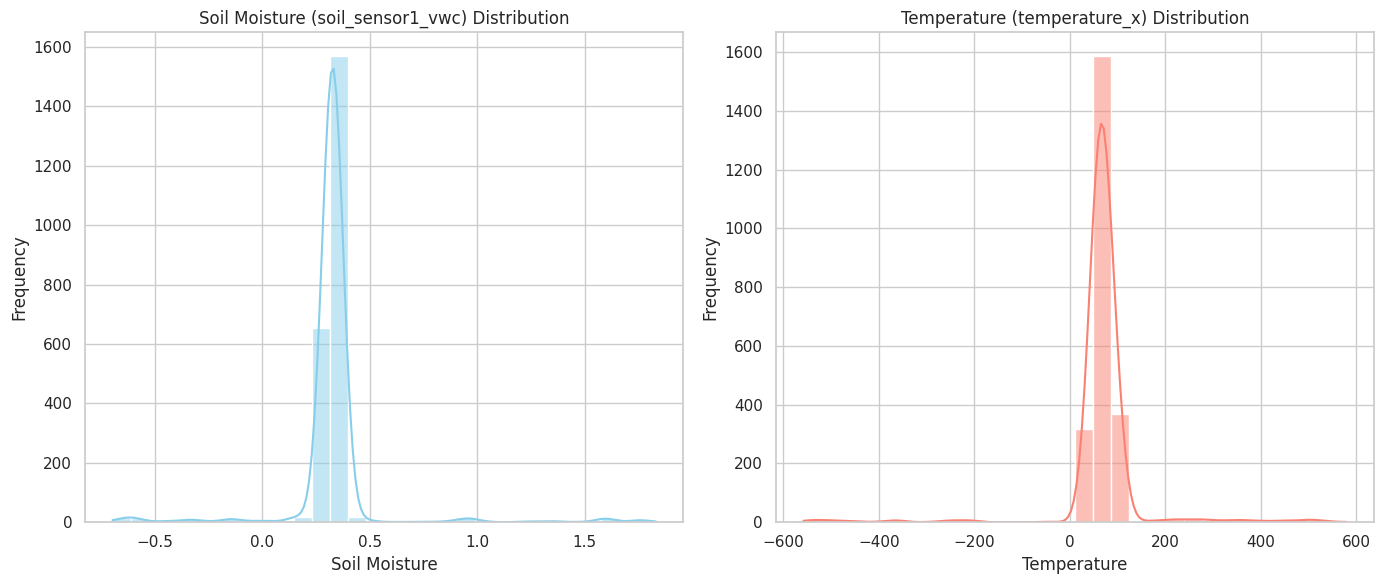

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distributions of target variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Soil moisture distribution
sns.histplot(merged_df['soil_sensor1_vwc'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Soil Moisture (soil_sensor1_vwc) Distribution')
axes[0].set_xlabel('Soil Moisture')
axes[0].set_ylabel('Frequency')

# Temperature distribution
sns.histplot(merged_df['temperature_x'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Temperature (temperature_x) Distribution')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


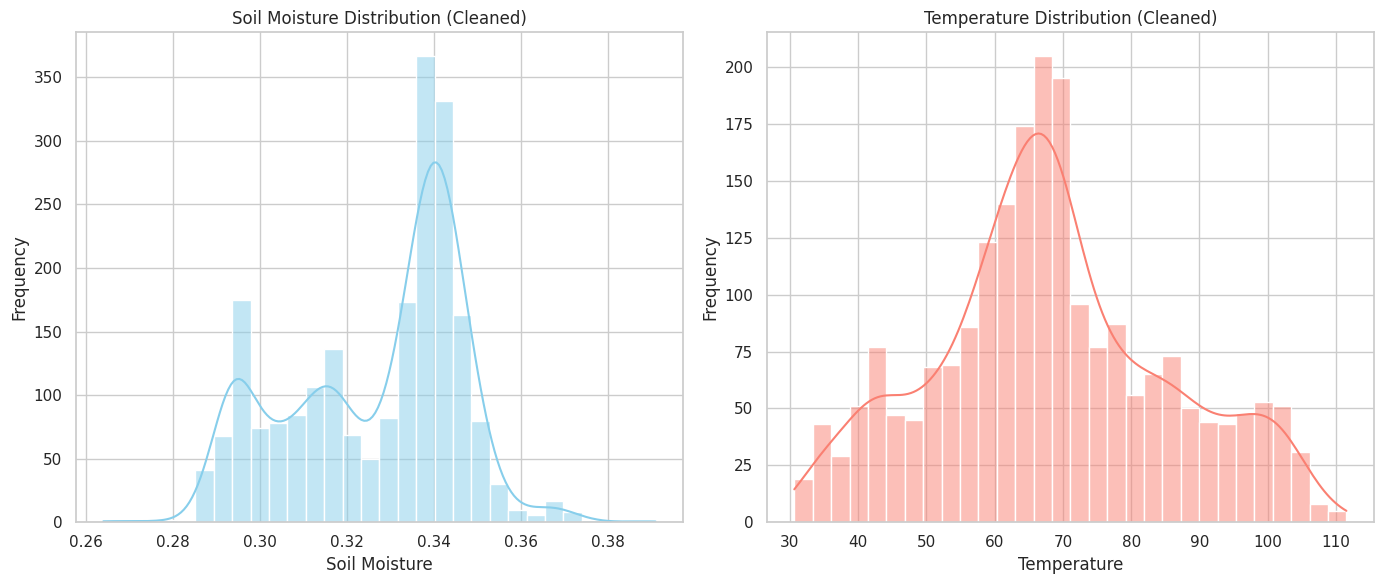

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

# Remove outliers from both target variables
cleaned_df = remove_outliers_iqr(merged_df, 'soil_sensor1_vwc')
cleaned_df = remove_outliers_iqr(cleaned_df, 'temperature_x')

# Plot distributions after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(cleaned_df['soil_sensor1_vwc'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Soil Moisture Distribution (Cleaned)')
axes[0].set_xlabel('Soil Moisture')
axes[0].set_ylabel('Frequency')

sns.histplot(cleaned_df['temperature_x'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Temperature Distribution (Cleaned)')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


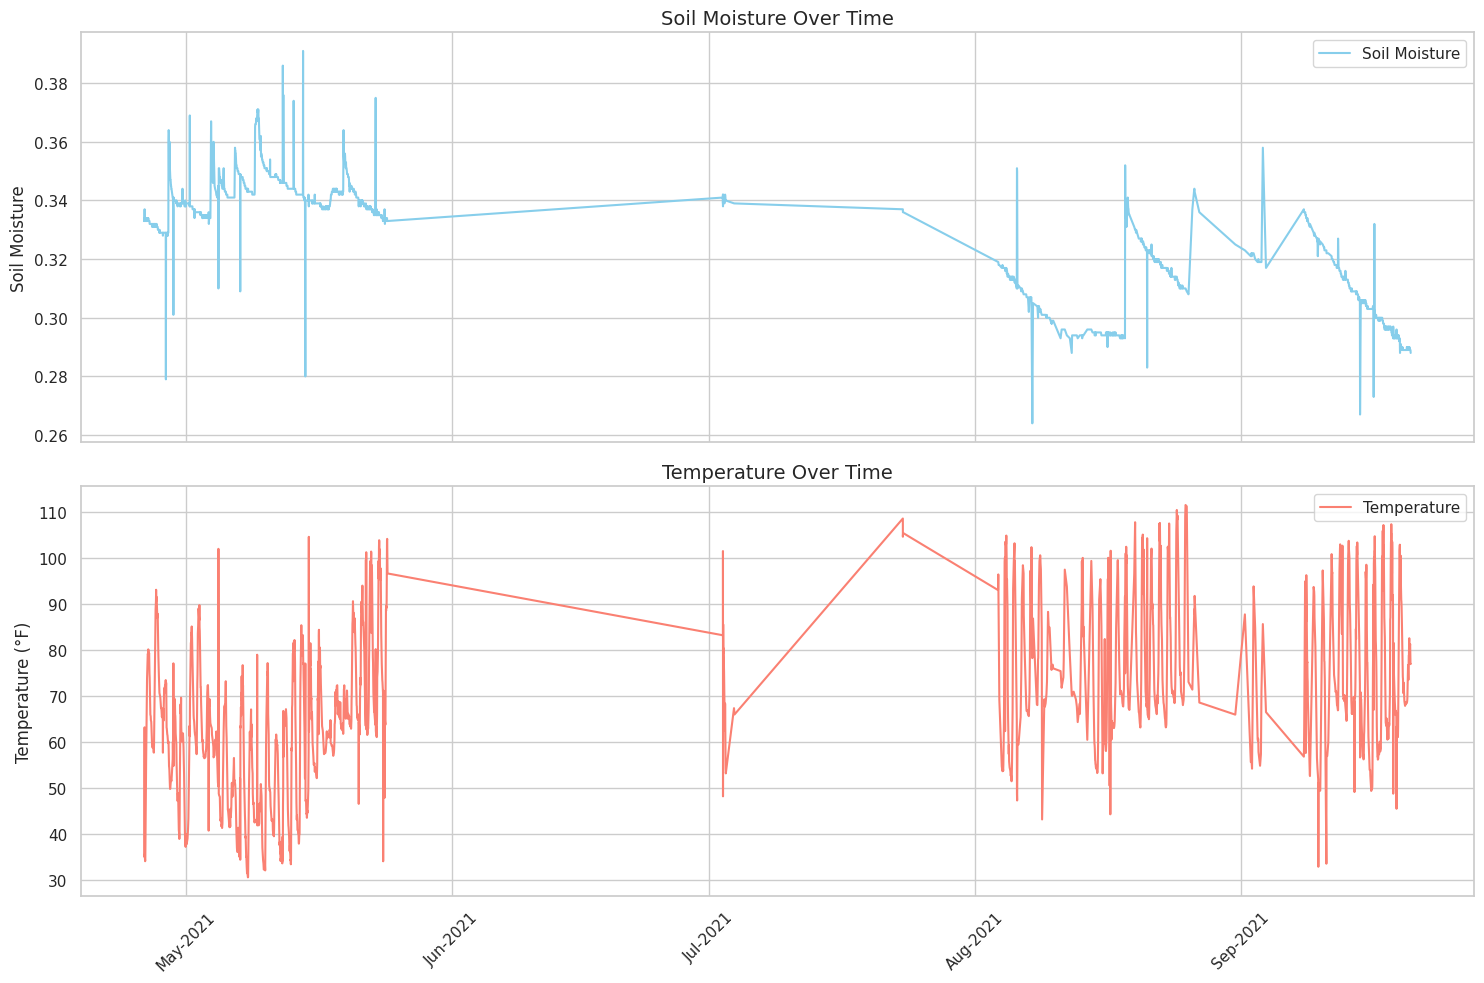

In [16]:
import matplotlib.dates as mdates

# Set 'time' as index for plotting
cleaned_df = cleaned_df.sort_values('time').set_index('time')

# Plot time series for soil moisture and temperature
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Soil Moisture Trend
axes[0].plot(cleaned_df.index, cleaned_df['soil_sensor1_vwc'], color='skyblue', label='Soil Moisture')
axes[0].set_title('Soil Moisture Over Time', fontsize=14)
axes[0].set_ylabel('Soil Moisture')
axes[0].legend()

# Temperature Trend
axes[1].plot(cleaned_df.index, cleaned_df['temperature_x'], color='salmon', label='Temperature')
axes[1].set_title('Temperature Over Time', fontsize=14)
axes[1].set_ylabel('Temperature (°F)')
axes[1].legend()

# Formatting x-axis
axes[1].xaxis.set_major_locator(mdates.MonthLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations from Time Series Trends:**

Soil Moisture:

Gradual decline over time with noticeable drops.
Possible irrigation or weather-induced changes.
Temperature:

Clear seasonal pattern with fluctuations.
Sharp changes indicate external influences (e.g., rainfall, cloud cover).

In [17]:
# Create lag features (1, 3, and 6 time steps)
lags = [1, 3, 6]
for lag in lags:
    cleaned_df[f'soil_moisture_lag_{lag}'] = cleaned_df['soil_sensor1_vwc'].shift(lag)
    cleaned_df[f'temperature_lag_{lag}'] = cleaned_df['temperature_x'].shift(lag)

# Create rolling mean features (3, 6, and 12 time steps)
windows = [3, 6, 12]
for window in windows:
    cleaned_df[f'soil_moisture_roll_mean_{window}'] = cleaned_df['soil_sensor1_vwc'].rolling(window=window).mean()
    cleaned_df[f'temperature_roll_mean_{window}'] = cleaned_df['temperature_x'].rolling(window=window).mean()

# Drop rows with NaN from feature creation
cleaned_df = cleaned_df.dropna()

# Check new features
cleaned_df.head()


,batt_vol,temperature_x,humidity_x,soil_sensor1_temp,soil_sensor2_temp,soil_sensor1_vwc,soil_sensor2_vwc,soil_sensor1_conductivity,soil_sensor2_conductivity,observation_time,...,soil_moisture_lag_3,temperature_lag_3,soil_moisture_lag_6,temperature_lag_6,soil_moisture_roll_mean_3,temperature_roll_mean_3,soil_moisture_roll_mean_6,temperature_roll_mean_6,soil_moisture_roll_mean_12,temperature_roll_mean_12
time,,,,,,,,,,,,,,,,,,,,,
2021-04-26 09:41:29,5.960725,56.660,66.18,49.46,32.0,0.333,-0.696,0.249,0.0,2021-04-26 09:45:00,...,0.334,39.362,0.333,34.574,0.333333,50.834,0.333333,43.397,0.333583,41.6105
2021-04-26 10:40:04,5.941564,64.202,57.19,49.28,32.0,0.333,-0.696,0.253,0.0,2021-04-26 10:45:00,...,0.334,43.322,0.333,34.142,0.333000,57.794,0.333333,48.407,0.333583,44.0000
2021-04-26 11:09:22,5.941564,68.000,53.25,49.10,32.0,0.334,-0.696,0.251,0.0,2021-04-26 11:15:00,...,0.333,52.520,0.333,34.376,0.333333,62.954,0.333500,54.011,0.333583,46.7405
2021-04-26 11:38:39,5.935816,71.114,50.03,49.10,32.0,0.334,-0.696,0.253,0.0,2021-04-26 11:45:00,...,0.333,56.660,0.334,39.362,0.333667,67.772,0.333500,59.303,0.333667,49.7285
2021-04-26 12:07:57,5.935816,73.778,47.38,49.10,32.0,0.334,-0.696,0.252,0.0,2021-04-26 12:15:00,...,0.333,64.202,0.334,43.322,0.334000,70.964,0.333500,64.379,0.333417,50.6075


In [18]:
from sklearn.model_selection import train_test_split

# Target variables
target_soil_moisture = 'soil_sensor1_vwc'
target_temperature = 'temperature_x'

# Features (excluding targets and datetime columns)
features = [col for col in cleaned_df.columns if col not in [
    target_soil_moisture, target_temperature, 'observation_time'
] and not col.startswith('soil_sensor') and not col.startswith('temperature')]

# Prepare data for soil moisture prediction
X_soil = cleaned_df[features]
y_soil = cleaned_df[target_soil_moisture]

# Prepare data for temperature prediction
X_temp = cleaned_df[features]
y_temp = cleaned_df[target_temperature]

# Train-test split (80-20 split)
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(X_soil, y_soil, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Confirm shapes
print(f"Soil Moisture - Train: {X_train_soil.shape}, Test: {X_test_soil.shape}")
print(f"Temperature - Train: {X_train_temp.shape}, Test: {X_test_temp.shape}")


Soil Moisture - Train: (1717, 26), Test: (430, 26)
Temperature - Train: (1717, 26), Test: (430, 26)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize the Random Forest Regressor with hyperparameters
rf_soil = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_soil.fit(X_train_soil, y_train_soil)

# Make predictions
y_pred_soil = rf_soil.predict(X_test_soil)

# Evaluate performance
r2_soil = r2_score(y_test_soil, y_pred_soil)
mae_soil = mean_absolute_error(y_test_soil, y_pred_soil)
rmse_soil = mean_squared_error(y_test_soil, y_pred_soil, squared=False)

print(f"Random Forest - Soil Moisture Prediction:")
print(f"R²: {r2_soil:.4f}, MAE: {mae_soil:.4f}, RMSE: {rmse_soil:.4f}")


Random Forest - Soil Moisture Prediction:
R²: 0.9579, MAE: 0.0011, RMSE: 0.0040


In [20]:
# Initialize the Random Forest Regressor with similar hyperparameters
rf_temp = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_temp.fit(X_train_temp, y_train_temp)

# Make predictions
y_pred_temp = rf_temp.predict(X_test_temp)

# Evaluate performance
r2_temp = r2_score(y_test_temp, y_pred_temp)
mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
rmse_temp = mean_squared_error(y_test_temp, y_pred_temp, squared=False)

print(f"Random Forest - Temperature Prediction:")
print(f"R²: {r2_temp:.4f}, MAE: {mae_temp:.4f}, RMSE: {rmse_temp:.4f}")


Random Forest - Temperature Prediction:
R²: 0.8962, MAE: 3.3712, RMSE: 5.4506


Random Forest: R²=0.9541, MAE=0.0011, RMSE=0.0042
XGBoost: R²=0.9304, MAE=0.0014, RMSE=0.0051
Gradient Boosting: R²=0.9372, MAE=0.0012, RMSE=0.0049
SVR: R²=-0.0022, MAE=0.0168, RMSE=0.0195
Linear Regression: R²=0.9688, MAE=0.0010, RMSE=0.0034


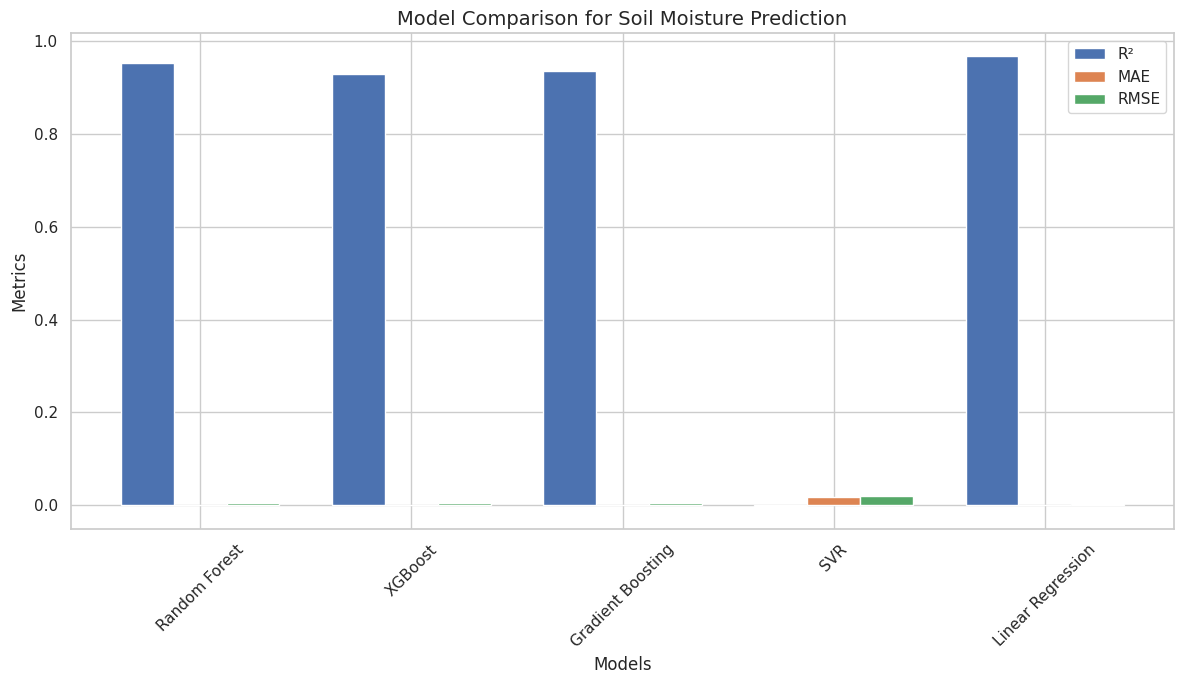

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Replace these variables with your actual data variables
X_train = X_train_soil  # Training features
X_test = X_test_soil    # Testing features
y_train = y_train_soil  # Training target
y_test = y_test_soil    # Testing target

# Models for comparison
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42),
    'SVR': SVR(C=10, kernel='rbf'),
    'Linear Regression': LinearRegression()
}

results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R²': r2, 'MAE': mae, 'RMSE': rmse})
    print(f"{name}: R²={r2:.4f}, MAE={mae:.4f}, RMSE={rmse:.4f}")

# Results DataFrame
results_df = pd.DataFrame(results)

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(results_df['Model']))
width = 0.25

ax.bar(x - width, results_df['R²'], width, label='R²')
ax.bar(x, results_df['MAE'], width, label='MAE')
ax.bar(x + width, results_df['RMSE'], width, label='RMSE')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metrics', fontsize=12)
ax.set_title('Model Comparison for Soil Moisture Prediction', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


Random Forest: R²=0.8945, MAE=3.3946, RMSE=5.4962
XGBoost: R²=0.9086, MAE=3.1183, RMSE=5.1161
Gradient Boosting: R²=0.9063, MAE=3.1018, RMSE=5.1788
SVR: R²=0.4933, MAE=8.9472, RMSE=12.0446
Linear Regression: R²=0.5948, MAE=8.2830, RMSE=10.7710


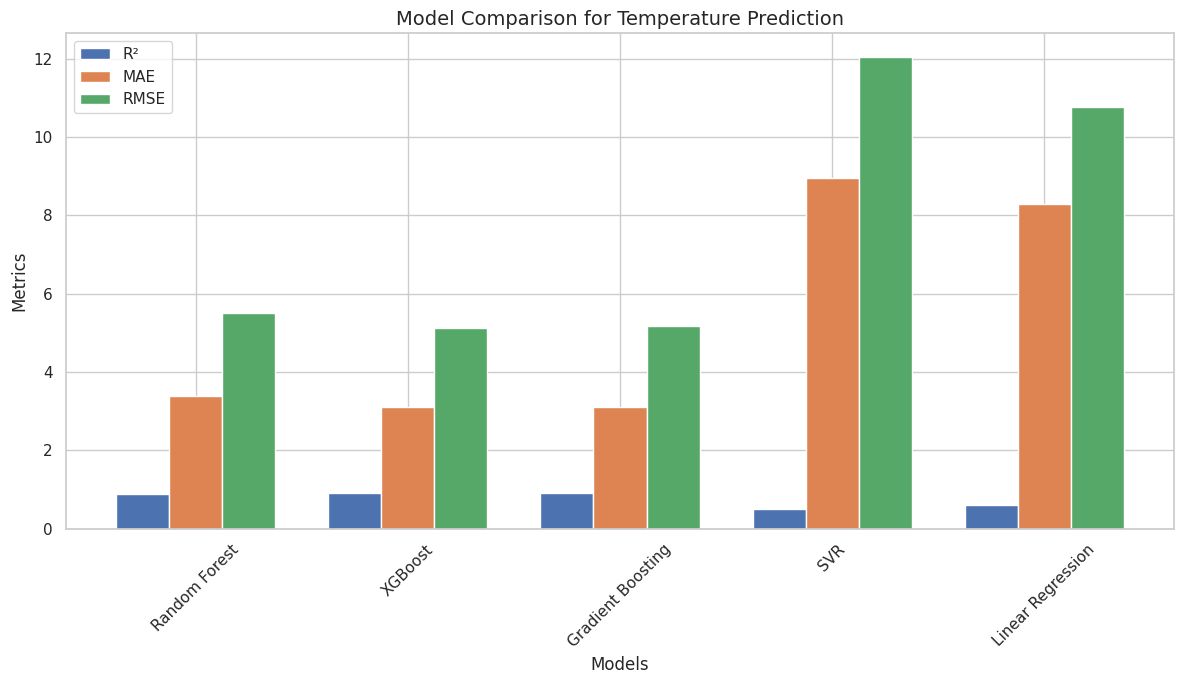

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Replace these variables with your actual temperature dataset variables
X_train = X_train_temp  # Training features for temperature
X_test = X_test_temp    # Testing features for temperature
y_train = y_train_temp  # Training target (temperature)
y_test = y_test_temp    # Testing target (temperature)

# Models for comparison
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42),
    'SVR': SVR(C=10, kernel='rbf'),
    'Linear Regression': LinearRegression()
}

results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R²': r2, 'MAE': mae, 'RMSE': rmse})
    print(f"{name}: R²={r2:.4f}, MAE={mae:.4f}, RMSE={rmse:.4f}")

# Results DataFrame
results_df = pd.DataFrame(results)

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(results_df['Model']))
width = 0.25

ax.bar(x - width, results_df['R²'], width, label='R²')
ax.bar(x, results_df['MAE'], width, label='MAE')
ax.bar(x + width, results_df['RMSE'], width, label='RMSE')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metrics', fontsize=12)
ax.set_title('Model Comparison for Temperature Prediction', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ----------------------------- Data Preparation -----------------------------

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_soil)
X_test_scaled = scaler_X.transform(X_test_soil)
y_train_scaled = scaler_y.fit_transform(y_train_soil.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_soil.values.reshape(-1, 1))

# Reshape features for LSTM input: (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ----------------------------- LSTM Model Building -----------------------------

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# ----------------------------- Model Training -----------------------------

history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,  # Increase epochs if needed
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# ----------------------------- Evaluation -----------------------------

# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test_scaled)

# Calculate metrics
r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
rmse = mean_squared_error(y_actual, y_pred, squared=False)

print(f"\nLSTM Soil Moisture Prediction:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1244 - val_loss: 0.0041
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [24]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_lstm_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=hp.Choice('units_1', [32, 64, 96]),
            return_sequences=True,
            input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]),
            activation='tanh'
        )
    )
    model.add(Dropout(rate=hp.Choice('dropout_1', [0.1, 0.2, 0.3])))
    model.add(
        LSTM(
            units=hp.Choice('units_2', [32, 64]),
            activation='tanh'
        )
    )
    model.add(Dense(units=hp.Choice('dense_units', [16, 32, 48]), activation='relu'))
    model.add(Dense(1))

    model.compile(
        optimizer='adam',
        loss='mse'
    )
    return model

# Setup Bayesian Optimization with fewer trials for efficiency
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning_results',
    project_name='soil_moisture_lstm_optimized'
)

# Perform tuning
tuner.search(
    X_train_scaled, y_train_scaled,
    epochs=30,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Retrieve the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")


Trial 5 Complete [00h 00m 11s]
val_loss: 0.0011297814780846238

Best val_loss So Far: 0.001028774306178093
Total elapsed time: 00h 00m 56s
Best Hyperparameters:
units_1: 64
dropout_1: 0.1
units_2: 32
dense_units: 32


**Optimized LSTM Architecture:**
Layer 1: 64 units, 10% dropout
Layer 2: 32 units
Dense Layer: 32 units
Best Validation Loss: 0.0010

In [42]:
# Include 'time' column before splitting
X_soil_with_time = cleaned_df[['time'] + [col for col in cleaned_df.columns if col not in ['soil_sensor1_vwc', 'temperature_x', 'observation_time']]]

# Train-test split with 'time' column
from sklearn.model_selection import train_test_split

X_train_soil_with_time, X_test_soil_with_time, y_train_soil, y_test_soil = train_test_split(
    X_soil_with_time, cleaned_df['soil_sensor1_vwc'], test_size=0.2, random_state=42, shuffle=False
)

# Extract 'time' after split
time_test = X_test_soil_with_time['time'].reset_index(drop=True)

# Remove 'time' column from features before LSTM training
X_train_soil = X_train_soil_with_time.drop(columns=['time'])
X_test_soil = X_test_soil_with_time.drop(columns=['time'])

In [43]:
# Build and train the optimized LSTM model
best_model = Sequential()
best_model.add(LSTM(64, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='tanh'))
best_model.add(Dropout(0.1))
best_model.add(LSTM(32, activation='tanh'))
best_model.add(Dense(32, activation='relu'))
best_model.add(Dense(1))

best_model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
history = best_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

# Predict on test data
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test_scaled)

# Evaluate performance
r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
rmse = mean_squared_error(y_actual, y_pred, squared=False)

print(f"\nOptimized LSTM Soil Moisture Prediction:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Export predictions to CSV
import pandas as pd

time_test = cleaned_df.loc[X_test_soil.index, 'time']

predictions_df = pd.DataFrame({
    'time': time_test,
    'Actual_Soil_Moisture': y_actual.flatten(),
    'Predicted_Soil_Moisture': y_pred.flatten()
})

csv_filename = 'optimized_lstm_soil_moisture_predictions.csv'
predictions_df.to_csv(csv_filename, index=False)
print(f"\nPredictions exported to '{csv_filename}'")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1430 - val_loss: 0.0131
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - val_loss: 0.0022
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_l

### Predict Temperature

In [45]:
# Include 'time' column before splitting
X_temp_with_time = cleaned_df[['time'] + [col for col in cleaned_df.columns if col not in ['temperature_x', 'soil_sensor1_vwc', 'observation_time']]]

# Train-test split with 'time' column
from sklearn.model_selection import train_test_split

X_train_temp_with_time, X_test_temp_with_time, y_train_temp, y_test_temp = train_test_split(
    X_temp_with_time, cleaned_df['temperature_x'], test_size=0.2, random_state=42, shuffle=False
)

# Extract 'time' from test set
time_test_temp = X_test_temp_with_time['time'].reset_index(drop=True)

# Remove 'time' column from features
X_train_temp = X_train_temp_with_time.drop(columns=['time'])
X_test_temp = X_test_temp_with_time.drop(columns=['time'])

In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Train XGBoost model
xgb_temp = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_temp.fit(X_train_temp, y_train_temp)

# Predict
y_pred_temp = xgb_temp.predict(X_test_temp)

# Evaluate
r2_temp = r2_score(y_test_temp, y_pred_temp)
mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
rmse_temp = mean_squared_error(y_test_temp, y_pred_temp, squared=False)

print(f"\nXGBoost Temperature Prediction:")
print(f"R²: {r2_temp:.4f}")
print(f"MAE: {mae_temp:.4f}")
print(f"RMSE: {rmse_temp:.4f}")


XGBoost Temperature Prediction:
R²: 0.8619
MAE: 4.0121
RMSE: 5.8602


In [58]:
# Step 1: Extract only the 'time' column as a 1D Series
if 'time' in X_test_temp_with_time.columns:
    time_test_temp = X_test_temp_with_time['time'].iloc[:, 0] if X_test_temp_with_time['time'].ndim > 1 else X_test_temp_with_time['time']
else:
    raise KeyError("The 'time' column was not found in X_test_temp_with_time.")

# Step 2: Flatten actual and predicted arrays
y_actual_temp_flat = np.ravel(y_test_temp)
y_pred_temp_flat = np.ravel(y_pred_temp)

# Step 3: Check lengths for consistency
assert len(time_test_temp) == len(y_actual_temp_flat) == len(y_pred_temp_flat), \
    f"Length mismatch: time={len(time_test_temp)}, actual={len(y_actual_temp_flat)}, predicted={len(y_pred_temp_flat)}"

# Step 4: Create DataFrame with predictions
predictions_temp_df = pd.DataFrame({
    'time': time_test_temp.reset_index(drop=True),
    'Actual_Temperature': y_actual_temp_flat,
    'Predicted_Temperature': y_pred_temp_flat
})

# Step 5: Export to CSV
csv_filename = 'xgboost_temperature_predictions.csv'
predictions_temp_df.to_csv(csv_filename, index=False)
print(f"\n Predictions exported to '{csv_filename}' successfully.")


✅ Predictions exported to 'xgboost_temperature_predictions.csv' successfully.


In [59]:
import shutil

# Path to the folder you want to download
folder_path = '/kaggle/working/tuning_results'
output_zip_path = '/kaggle/working/tuning_results.zip'

# Zip the folder
shutil.make_archive(base_name=output_zip_path.replace('.zip', ''), format='zip', root_dir=folder_path)
print(f" Folder zipped successfully at: {output_zip_path}")

 Folder zipped successfully at: /kaggle/working/tuning_results.zip
